In [1]:
import pandas as pd
import numpy as np

In [2]:
pop_df = pd.read_csv("./West Coast 2023 Datasets/Traffic, Investigations _ Other/philadelphia_population_metrics.csv")

In [3]:
pop_df = pop_df.dropna(axis=0, how="any")
pop_df = pop_df.rename(columns={'GEOGRAPHY_NAME': "fips", 'COUNT_ALL_RACES_ETHNICITIES': 'count', 
                        "COUNT_WHITE_NH": "White - Non-Latino Count", "COUNT_BLACK_NH": "Black - Non-Latino Count",
                       "COUNT_ASIAN_NH": 'Asian Count', "COUNT_HISPANIC": 'Latino Count',
                               "PERCENT_WHITE_NH": "White - Non-Latino", "PERCENT_BLACK_NH": "Black - Non-Latino",
                               "PERCENT_ASIAN_NH": "Asian", "PERCENT_HISPANIC": "Latino"})

#pop_df.pivot(index="fips",columns="Race Percentage",values=["White - Non-Latino","Black - Non-Latino", "Asian", "Latino"])
pop_df = pop_df.drop(["OBJECTID", "GEOGRAPHY", "Shape__Area", "Shape__Length"
                     # 'Asian Count', 'Latino Count', "White - Non-Latino Count", "Black - Non-Latino Count"
                     ], axis=1)
pop_df2 = pd.melt(pop_df, id_vars=["fips"], value_vars=["Asian", "Latino", "White - Non-Latino", "Black - Non-Latino"])
print(pop_df)
pop_df2

            fips  count  White - Non-Latino Count  Black - Non-Latino Count  \
0    42101000100   3478                      2890                       207   
1    42101000200   2937                       665                       284   
2    42101000300   3169                      2290                       324   
3    42101000401   2125                      1049                       376   
4    42101000402   3142                      2455                       173   
..           ...    ...                       ...                       ...   
376  42101980300      2                         2                         0   
380  42101980700      5                         0                         3   
381  42101980800      6                         4                         1   
382  42101980900     30                         9                        18   
383  42101989100   7765                       975                      5469   

     Asian Count  Latino Count  White - Non-Latino 

,fips,variable,value
0,42101000100,Asian,4.974123
1,42101000200,Asian,63.159687
2,42101000300,Asian,10.350268
3,42101000401,Asian,24.423529
4,42101000402,Asian,11.330363
...,...,...,...
1519,42101980300,Black - Non-Latino,0.000000
1520,42101980700,Black - Non-Latino,60.000000
1521,42101980800,Black - Non-Latino,16.666667
1522,42101980900,Black - Non-Latino,60.000000


In [4]:
districts = pd.read_csv("./West Coast 2023 Datasets/Traffic, Investigations _ Other/traffic_stops_philadelphia.csv")
districts = districts.dropna(axis=0, how="any")
districts["fips"] = districts["fips"].astype("float").astype("int64")
districts = districts[["fips", "district"]]
districts = districts.drop_duplicates()
districts

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,fips,district
36,421010096004,19.0
46,421010084004,18.0
84,421010064003,12.0
144,421010093004,19.0
157,421010095001,19.0
...,...,...
1819267,420912000000,19.0
1842039,421010168006,39.0
1846190,420912000000,2.0
1862241,421010267006,26.0


In [5]:
pop_df

,fips,count,White - Non-Latino Count,Black - Non-Latino Count,Asian Count,Latino Count,White - Non-Latino,Black - Non-Latino,Asian,Latino
0,42101000100,3478,2890,207,173,126,83.093732,5.951696,4.974123,3.622772
1,42101000200,2937,665,284,1855,79,22.642152,9.669731,63.159687,2.689820
2,42101000300,3169,2290,324,328,135,72.262543,10.224045,10.350268,4.260019
3,42101000401,2125,1049,376,519,107,49.364706,17.694118,24.423529,5.035294
4,42101000402,3142,2455,173,356,109,78.134946,5.506047,11.330363,3.469128
...,...,...,...,...,...,...,...,...,...,...
376,42101980300,2,2,0,0,0,100.000000,0.000000,0.000000,0.000000
380,42101980700,5,0,3,1,1,0.000000,60.000000,20.000000,20.000000
381,42101980800,6,4,1,0,0,66.666667,16.666667,0.000000,0.000000
382,42101980900,30,9,18,0,2,30.000000,60.000000,0.000000,6.666667


In [6]:
inv_df = pd.read_csv("./West Coast 2023 Datasets/Traffic, Investigations _ Other/investigations.csv")
len(inv_df)

2785087

In [7]:
inv_df["fips"] = inv_df["fips"].astype('Int64')
inv_df = inv_df.dropna(axis=0, how="any")
inv_df = pd.merge(inv_df, districts, how="left", on="fips")
inv_df = inv_df.dropna(axis=0, how="any")

In [8]:
inv_df.head(1)

,id,datetimeoccur,weekday,location,districtoccur,psa,stoptype,inside_or_outside,gender,race,...,individual_searched,individual_arrested,individual_contraband,vehicle_frisked,vehicle_searched,vehicle_contraband,lat,lng,fips,district
0,1767776,2014-05-14 00:00:00+00,TUESDAY,300 BLOCK S 13TH ST,6,3,pedestrian,Outside,Male,Black - Non-Latino,...,0,0,0,0,0,0,39.946671,-75.162656,421010011014,3.0


In [9]:
inv_df["year"] = pd.DatetimeIndex(inv_df['datetimeoccur']).year

In [10]:
inv_groups = inv_df.groupby(["district", "year", "race"]).size().reset_index(name="counts")
#inv_df.groupby(["fips", "year", "race"])
# pd.pivot_table(inv_df, index = ["fips", "year"], columns = "race", aggfun=np.count)

In [11]:
inv_year_count = inv_df.groupby(["district", "year"]).size().reset_index(name="counts")


In [12]:
inv_groups["percentage"] = inv_groups.apply(lambda row: float(row["counts"] / 
                                                              inv_year_count.loc[(inv_year_count['year'] == row["year"])& (inv_year_count['district'] == row["district"])]["counts"] * 100)
                                                              , axis=1).T
                               #             (row["counts"] / 
                                          #  inv_year_count.loc[(inv_year_count['year'] == row["year"]) 
                                          #                     & (inv_year_count['fips'] == row["fips"])]["counts"]), axis=1).T

In [13]:
inv_year_count = inv_year_count[inv_year_count["counts"] > 10]


In [14]:
inv_all_percentage = pd.merge(inv_year_count, inv_groups, on=["district", "year"], how="left")

In [96]:
pop_df2 = pd.merge(pop_df2, districts, on="fips", how="left")

In [97]:
pop_df2

,fips,variable,value,district_x,district_y
0,42101000100,Asian,4.974123,NaN,NaN
1,42101000200,Asian,63.159687,NaN,NaN
2,42101000300,Asian,10.350268,NaN,NaN
3,42101000401,Asian,24.423529,NaN,NaN
4,42101000402,Asian,11.330363,NaN,NaN
...,...,...,...,...,...
1519,42101980300,Black - Non-Latino,0.000000,NaN,NaN
1520,42101980700,Black - Non-Latino,60.000000,NaN,NaN
1521,42101980800,Black - Non-Latino,16.666667,NaN,NaN
1522,42101980900,Black - Non-Latino,60.000000,NaN,NaN


In [15]:
districts["fips"] = districts.apply(lambda row: int(row["fips"] / 10) if len(str(row["fips"])) > 11 else row["fips"], axis = 1)
pop_df2 = pd.merge(pop_df2, districts, on="fips", how="left")
pop_df2 = pop_df2.dropna(axis=1, how="any")
pop_df2 = pop_df2.rename(columns={"district_y": "district"})
inv_vs_pop = pd.merge(inv_all_percentage, pop_df2, on="district", how="left")

In [16]:
inv_vs_pop = inv_vs_pop.dropna(axis=0, how="any")

In [17]:
inv_vs_pop = inv_vs_pop[inv_vs_pop["race"] == inv_vs_pop["variable"]]

In [18]:
inv_vs_pop["representation"] = inv_vs_pop.apply(lambda row: row["percentage"] / row["value"] if row["value"] > 0 else 1, axis = 1)

In [19]:
inv_vs_pop = inv_vs_pop.sort_values(by="representation", ascending=False)

In [20]:
inv_vs_pop

,district,year,counts_x,race,counts_y,percentage,fips,variable,value,representation
490481,39.0,2020,15397,Black - Non-Latino,11949,77.606027,42101003902,Black - Non-Latino,0.308698,251.397878
494905,39.0,2022,23691,Black - Non-Latino,17559,74.116753,42101003902,Black - Non-Latino,0.308698,240.094683
492693,39.0,2021,26417,Black - Non-Latino,19492,73.785820,42101003902,Black - Non-Latino,0.308698,239.022653
488269,39.0,2019,99598,Black - Non-Latino,72482,72.774554,42101003902,Black - Non-Latino,0.308698,235.746746
483845,39.0,2017,77580,Black - Non-Latino,55643,71.723382,42101003902,Black - Non-Latino,0.308698,232.341569
...,...,...,...,...,...,...,...,...,...,...
252939,16.0,2020,3624,Asian,38,1.048565,42101036900,Asian,32.285386,0.032478
250195,16.0,2018,17866,Asian,186,1.041084,42101036900,Asian,32.285386,0.032246
192288,14.0,2020,8199,Asian,37,0.451275,42101033400,Asian,14.512041,0.031097
251567,16.0,2019,24968,Asian,249,0.997277,42101036900,Asian,32.285386,0.030889


In [21]:
inv_avg_percentage = inv_vs_pop.groupby(["year", "race"]).mean()
inv_avg_percentage = inv_vs_pop.drop(["counts_x", "counts_y", "variable", "fips"], axis=1)
inv_avg_percentage = inv_avg_percentage.rename(columns={"percentage": "Percentage of Investigations", "value": "Percentage of District Demographic"})
inv_avg_percentage = inv_avg_percentage.drop_duplicates()
inv_avg_percentage

,district,year,race,Percentage of Investigations,Percentage of District Demographic,representation
490481,39.0,2020,Black - Non-Latino,77.606027,0.308698,251.397878
494905,39.0,2022,Black - Non-Latino,74.116753,0.308698,240.094683
492693,39.0,2021,Black - Non-Latino,73.785820,0.308698,239.022653
488269,39.0,2019,Black - Non-Latino,72.774554,0.308698,235.746746
483845,39.0,2017,Black - Non-Latino,71.723382,0.308698,232.341569
...,...,...,...,...,...,...
252939,16.0,2020,Asian,1.048565,32.285386,0.032478
250195,16.0,2018,Asian,1.041084,32.285386,0.032246
192288,14.0,2020,Asian,0.451275,14.512041,0.031097
251567,16.0,2019,Asian,0.997277,32.285386,0.030889


        district  year                race  Percentage of Investigations  \
494905      39.0  2022  Black - Non-Latino                     74.116753   
494044      39.0  2022               Asian                      3.195306   
495789      39.0  2022  White - Non-Latino                     13.481913   
495847      39.0  2022  White - Non-Latino                     13.481913   
494049      39.0  2022               Asian                      3.195306   
...          ...   ...                 ...                           ...   
495852      39.0  2022  White - Non-Latino                     13.481913   
495823      39.0  2022  White - Non-Latino                     13.481913   
495817      39.0  2022  White - Non-Latino                     13.481913   
495850      39.0  2022  White - Non-Latino                     13.481913   
495774      39.0  2022  White - Non-Latino                     13.481913   

        Percentage of District Demographic  representation  
494905                    

<AxesSubplot:xlabel='race'>

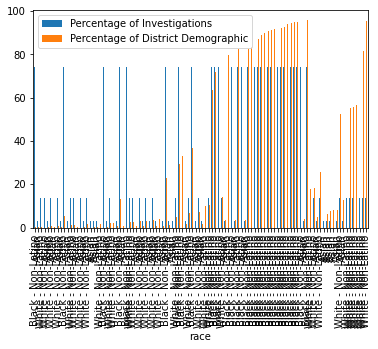

In [22]:
dist_39 = inv_avg_percentage[(inv_avg_percentage["district"] == 39.0) & (inv_avg_percentage["year"] == 2022)]
dist_39 = dist_39.drop_duplicates()
print(dist_39)
dist_39.plot(x="race", y=["Percentage of Investigations", "Percentage of District Demographic"], kind="bar")

In [31]:
inv_vs_pop.to_csv("./cleaned/inv_vs_pop_by_district.csv")